<h2 style="color:darkred;font-size:30px">Projet 4 : Segmentez des clients d'un site e-commerce</h2>

<img src="images\olist.png" style="width: 250px;"/>

<h2 style="color:darkred;font-size:30px">Notebook 2 : Modélisation (K-Means)</h2>

---
---
---

<h2 style="color:darkred;font-size:20px">Sommaire</h2>
    
    Notebook 1 ____ Nettoyage ________________________________________________________________
    
    Notebook 2 ____ Modélisation (Machine Learning) __________________________________________
    6. Preprocessing
        6.1 Standardisation
        6.2 Réduction dimensionnelle (ACP)
    7. K-Means (avec les catégories des produits)
        7.1 Evaluation et optimisation
        7.2 Visualisation et interprétation des clusters

In [37]:
# les libraries nécessaires :

import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
# pour voir toutes les colonnes
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_row', 100)

# style de titres
font = {'family': 'Arial',
        'color':  'darkred',
        'weight': 'bold',
        'size': 30,
        }

In [39]:
# lire le fichier csv data_clean
olist_data = pd.read_csv('data/olist_data_clean.csv',
                         index_col='customer_unique_id')
print('Le jeu des données olist_data compte {} colonnes et {} lignes.'.format(olist_data.shape[1],
                                                                              olist_data.shape[0]))

Le jeu des données olist_data compte 28 colonnes et 96093 lignes.


In [40]:
# Remise en forme les datatypes

liste = list(olist_data.columns)
liste.remove('last_purchase')
liste
for column in liste:
    olist_data[column] = olist_data[column].astype('Int64')

olist_data['last_purchase'] = olist_data['last_purchase'].astype(
    'datetime64[ns]')

In [41]:
olist_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96093 entries, 861eff4711a542e4b93843c6dd7febb0 to 84732c5050c01db9b23e19ba39899398
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   anciennete_du_client    96093 non-null  Int64         
 1   last_purchase           96093 non-null  datetime64[ns]
 2   date_derniere_commande  96093 non-null  Int64         
 3   nb_commandes            96093 non-null  Int64         
 4   nb_payements            96093 non-null  Int64         
 5   nb_produit              96093 non-null  Int64         
 6   depense_total           96093 non-null  Int64         
 7   review_score_min        96093 non-null  Int64         
 8   montant_commande_max    96093 non-null  Int64         
 9   montant_produit_max     95419 non-null  Int64         
 10  frais_de_port_moy       95419 non-null  Int64         
 11  delai_livraison_max     93355 non-null  Int64        

In [42]:
data = olist_data.drop(['last_purchase'], axis=1)

In [43]:
#data.drop(['maison_gift_beauty', 'technologie',
#       'maison_exterior', 'books_media', 'foods_beverages', 'sports',
#       'industry', 'office_furniture'], axis=1, inplace=True)

# data.drop(['distance'], axis=1, inplace=True)

# data.drop(['date_derniere_commande', 'montant_produit_max'], axis=1, inplace=True)

In [44]:
# Enlevons toutes les valeurs manquantes

data.dropna(how='any', inplace=True)

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92889 entries, 861eff4711a542e4b93843c6dd7febb0 to 84732c5050c01db9b23e19ba39899398
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   anciennete_du_client    92889 non-null  Int64
 1   date_derniere_commande  92889 non-null  Int64
 2   nb_commandes            92889 non-null  Int64
 3   nb_payements            92889 non-null  Int64
 4   nb_produit              92889 non-null  Int64
 5   depense_total           92889 non-null  Int64
 6   review_score_min        92889 non-null  Int64
 7   montant_commande_max    92889 non-null  Int64
 8   montant_produit_max     92889 non-null  Int64
 9   frais_de_port_moy       92889 non-null  Int64
 10  delai_livraison_max     92889 non-null  Int64
 11  delai_estime            92889 non-null  Int64
 12  volume_produit_max      92889 non-null  Int64
 13  densite_produit_max     92889 non-null  Int64
 14  distance         

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92889 entries, 861eff4711a542e4b93843c6dd7febb0 to 84732c5050c01db9b23e19ba39899398
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   anciennete_du_client    92889 non-null  Int64
 1   date_derniere_commande  92889 non-null  Int64
 2   nb_commandes            92889 non-null  Int64
 3   nb_payements            92889 non-null  Int64
 4   nb_produit              92889 non-null  Int64
 5   depense_total           92889 non-null  Int64
 6   review_score_min        92889 non-null  Int64
 7   montant_commande_max    92889 non-null  Int64
 8   montant_produit_max     92889 non-null  Int64
 9   frais_de_port_moy       92889 non-null  Int64
 10  delai_livraison_max     92889 non-null  Int64
 11  delai_estime            92889 non-null  Int64
 12  volume_produit_max      92889 non-null  Int64
 13  densite_produit_max     92889 non-null  Int64
 14  distance         

# 6. Preprocessing

In [47]:
from sklearn import decomposition

## 6.1 Standardisation

In [48]:
X = data.values

In [49]:
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# MinMaxScaler()

## 6.2 Réduction dimensionnelle (ACP)

_Pour rappel, l’objectif d’une analyse par composantes principales est de réduire la dimension du jeu de donnée en conservant un maximum d’information, c’est à dire de variance. En d' autres termes, nous voulons réduire la dimension des données, tout en gardant autant que possible les informations qui permettent de distinguer les observations._

### Scree Plot

_Ce graphique présente la proportion de variance expliquée par la k-ième composante principale, ou par les k premières composantes principales, en fonction de k._

In [50]:
def display_scree_plot(pca):
    '''Display a scree plot for the pca'''

    scree = pca.explained_variance_ratio_*100
    fig = plt.figure(figsize=(10, 5))
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(), c="red", marker='o')
    plt.xlabel("Number of principal components")
    plt.ylabel("Percentage explained variance")
    plt.axhline(y=95, linestyle='-', color='blue', linewidth=2)
    plt.title("Scree plot")
    plt.show(block=False)

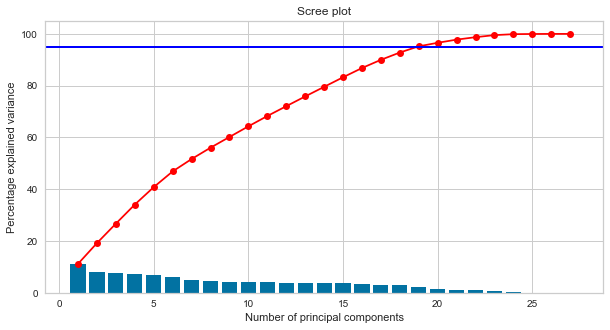

In [51]:
num_components = 27
pca_all = decomposition.PCA(n_components=num_components, random_state=42)
pca_all.fit(X_scaled)

display_scree_plot(pca_all)

# 18

In [52]:
print(pca_all.explained_variance_ratio_.cumsum().round(2))

[0.11 0.19 0.27 0.34 0.41 0.47 0.52 0.56 0.6  0.64 0.68 0.72 0.76 0.8
 0.83 0.87 0.9  0.93 0.95 0.97 0.98 0.99 1.   1.   1.   1.   1.  ]


In [53]:
# nous sélectionnons le nombre de composants principaux que nous retournerons
num_components = 18

pca = decomposition.PCA(n_components=num_components, random_state=42)
pca.fit(X_scaled)

# Transform the scaled data to the new PCA space
X_reduced = pca.transform(X_scaled)

### Cercle des Correlations

In [54]:
palette = sns.color_palette("bright", 10)


def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    """Display correlation circles, one for each factorial plane"""

    # For each factorial plane
    for d1, d2 in axis_ranks:
        if d2 < n_comp:

            # Initialise the matplotlib figure
            fig, ax = plt.subplots(figsize=(8, 8))

            # Determine the limits of the chart
            if lims is not None:
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30:
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else:
                xmin, xmax, ymin, ymax = min(pcs[d1, :]), max(
                    pcs[d1, :]), min(pcs[d2, :]), max(pcs[d2, :])

            # Add arrows
            # If there are more than 30 arrows, we do not display the triangle at the end
            if pcs.shape[1] < 30:
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                           pcs[d1, :], pcs[d2, :],
                           angles='xy', scale_units='xy', scale=1, color="darkred", width=.002)
                # (see the doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0, 0], [x, y]] for x, y in pcs[[d1, d2]].T]
                ax.add_collection(LineCollection(
                    lines, axes=ax, alpha=.1, color='black'))

            # Display variable names
            if labels is not None:
                for i, (x, y) in enumerate(pcs[[d1, d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax:
                        plt.text(x, y, labels[i], fontsize='10', ha='left', va='center',
                                 rotation=label_rotation, color="green", alpha=0.9)

            # Display circle
            circle = plt.Circle((0, 0), 1, facecolor='none',
                                edgecolor='darkred')
            plt.gca().add_artist(circle)

            # Define the limits of the chart
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)

            # Display grid lines
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # Label the axes, with the percentage of variance explained
            plt.xlabel('PC{} ({}%)'.format(
                d1+1, round(100*pca.explained_variance_ratio_[d1], 1)))
            plt.ylabel('PC{} ({}%)'.format(
                d2+1, round(100*pca.explained_variance_ratio_[d2], 1)))

            plt.title("Cercle des corrélations (PC{} et PC{})".format(d1+1, d2+1))
            plt.show(block=False)

In [55]:
import plotly.express as px

# 7. k-Means

In [56]:
from sklearn.cluster import KMeans

## 7.1 Evaluation et optimisation

### La méthode Elbow

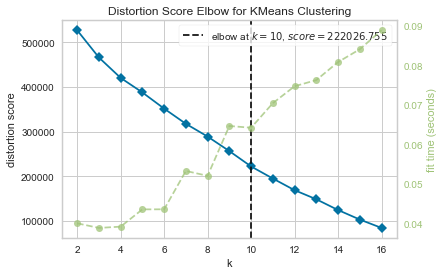

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [57]:
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# Generate synthetic dataset with 8 random clusters
X, y = make_blobs(n_samples=1000, n_features=18, centers=20, random_state=42)

# Instantiate the clustering model and visualizer
visualizer = KElbowVisualizer(KMeans(), k=(2,17))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

# reference : https://www.scikit-yb.org/en/latest/api/cluster/elbow.html
# https://www.kaggle.com/kautumn06/yellowbrick-clustering-evaluation-examples
# si erreur : https://github.com/DistrictDataLabs/yellowbrick/issues/1137

### Silhouette score

In [58]:
%pylab inline

from sklearn import cluster, metrics

Populating the interactive namespace from numpy and matplotlib


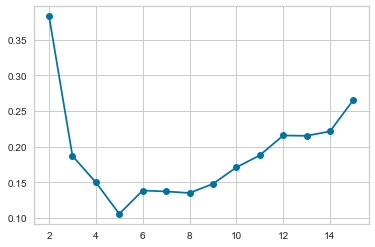

In [59]:
silhouettes = []

for num_clusters in range(2, 16):
    cls = cluster.KMeans(
        n_clusters=num_clusters,
        n_init=num_clusters,
        init='k-means++',
        random_state=42,
    )
    cls.fit(X_reduced)
    silh = metrics.silhouette_score(X_reduced, cls.labels_, sample_size=1000)
    silhouettes.append(silh)

plt.plot(range(2, 16), silhouettes, marker='o')

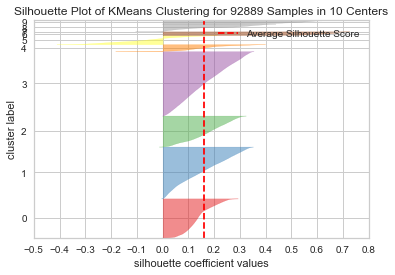

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 92889 Samples in 10 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [60]:
# Instantiate the clustering model and visualizer 
visualizer = SilhouetteVisualizer(KMeans(init='k-means++', n_clusters=10, n_init=6))

visualizer.fit(X_reduced)    # Fit the data to the visualizer
visualizer.show()    # Draw/show/poof the data

#https://towardsdatascience.com/performance-metrics-in-machine-learning-part-3-clustering-d69550662dc6

## 7.2 Exécution de l'algorithme pour les meilleurs hyperparamètres

In [61]:
# Create a k-means clustering model
kmeans = KMeans(init='random', n_clusters=10, n_init=10)
# We will ask for 8 clusters (the  n_clusters  parameter) and
# ask for clustering to be performed 10 times,
# starting with different centroids (this is the  n_init  parameter)

# Fit the data to the model
kmeans.fit(X_reduced)

# Determine which clusters each data point belongs to:
clusters =  kmeans.predict(X_reduced)

In [62]:
# Add the cluster number to the original scaled data
X_clustered = pd.DataFrame(X_scaled, index=data.index, columns=data.columns)
X_clustered["cluster"] = clusters

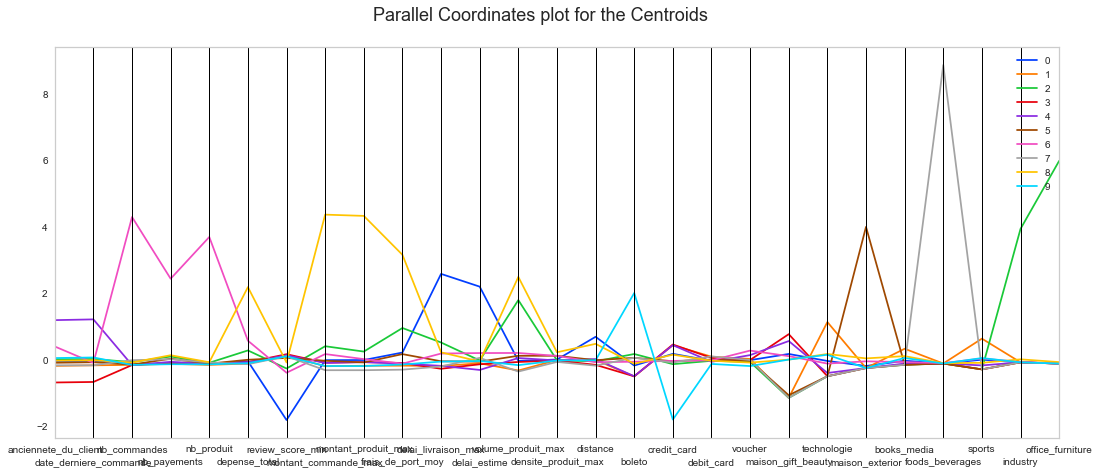

In [35]:
# Create a data frame containing our centroids
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=data.columns)
centroids['cluster'] = centroids.index

display_parallel_coordinates_centroids(centroids, 10)

# 8. Visualisation et interprétation des clusters

### Individuals Factor Map

In [28]:
def addAlpha(colour, alpha):
    '''Add an alpha to the RGB colour'''

    return (colour[0], colour[1], colour[2], alpha)


def append_class(df, class_name, feature, thresholds, names):
    '''Append a new class feature named 'class_name' based on a threshold split of 'feature'.  Threshold values are in 'thresholds' and class names are in 'names'.'''

    n = pd.cut(df[feature], bins=thresholds, labels=names)
    df[class_name] = n


def display_factorial_planes(X_projected,
                             n_comp,
                             pca,
                             axis_ranks,
                             labels=None,
                             alpha=1,
                             illustrative_var=None):
    '''Display a scatter plot on a factorial plane, one for each factorial plane'''

    # For each factorial plane
    for d1, d2 in axis_ranks:
        if d2 < n_comp:

            # Initialise the matplotlib figure
            fig = plt.figure(figsize=(7, 6))

            # Display the points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1],
                            X_projected[:, d2],
                            alpha=alpha,
                           s=20)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1],
                                X_projected[selected, d2],
                                alpha=alpha, s=20,
                                label=value,
                               )
                plt.legend()

            # Display the labels on the points
            if labels is not None:
                for i, (x, y) in enumerate(X_projected[:, [d1, d2]]):
                    plt.text(x,
                             y,
                             labels[i],
                             fontsize='14',
                             ha='center',
                             va='center')

            # Define the limits of the chart
            boundary = np.max(np.abs(X_projected[:, [d1, d2]])) * 1.1
            plt.xlim([-10, 20])
            plt.ylim([-10, 20])

            # Display grid lines
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # Label the axes, with the percentage of variance explained
            plt.xlabel('PC{} ({}%)'.format(
                d1 + 1, round(100 * pca.explained_variance_ratio_[d1], 1)))
            plt.ylabel('PC{} ({}%)'.format(
                d2 + 1, round(100 * pca.explained_variance_ratio_[d2], 1)))

            plt.title("Projection of points (on PC{} and PC{})".format(
                d1 + 1, d2 + 1))
            #plt.show(block=False)

In [29]:
# Take a copy of the data an add a new column for the banding
#classed_data = data.copy()
#append_class(classed_data, 'rank_band','review_score_min',[0,1,2,3,4,5],['1','2','3','4','5'])

# Get a list of the new bandings that we can pass to the plot
#classed_data = classed_data.reset_index()
#rank_band = [classed_data.loc[uni_id, "rank_band"] for uni_id in range(0,len(X_scaled))]

### Parallel Coordinates Plot

In [30]:
from pandas.plotting import parallel_coordinates

In [31]:
def addAlpha(colour, alpha):
    '''Add an alpha to the RGB colour'''
    
    return (colour[0],colour[1],colour[2],alpha)

In [32]:
def display_parallel_coordinates(df, num_clusters):
    '''Display a parallel coordinates plot for the clusters in df'''

    # Select data points for individual clusters
    cluster_points = []
    for i in range(num_clusters):
        cluster_points.append(df[df.cluster==i])
    
    # Create the plot
    fig = plt.figure(figsize=(18, 7))
    title = fig.suptitle("Parallel Coordinates Plot for the Clusters", fontsize=18)
    fig.subplots_adjust(top=0.95, wspace=0)

    # Display one plot for each cluster, with the lines for the main cluster appearing over the lines for the other clusters
    for i in range(num_clusters):    
        plt.subplot(num_clusters, 1, i+1)
        for j,c in enumerate(cluster_points): 
            if i!= j:
                pc = parallel_coordinates(c, 'cluster', color=[addAlpha(palette[j],0.2)])
        pc = parallel_coordinates(cluster_points[i], 'cluster', color=[addAlpha(palette[i],0.5)])

        # Stagger the axes
        ax=plt.gca()
        for tick in ax.xaxis.get_major_ticks()[1::2]:
            tick.set_pad(20) 

In [33]:
def display_parallel_coordinates_centroids(df, num_clusters):
    '''Display a parallel coordinates plot for the centroids in df'''

    # Create the plot
    fig = plt.figure(figsize=(18, 7))
    title = fig.suptitle("Parallel Coordinates plot for the Centroids", fontsize=18)
    fig.subplots_adjust(top=0.9, wspace=0)

    # Draw the chart
    parallel_coordinates(df, 'cluster', color=palette)

    # Stagger the axes
    ax=plt.gca()
    for tick in ax.xaxis.get_major_ticks()[1::2]:
        tick.set_pad(20)

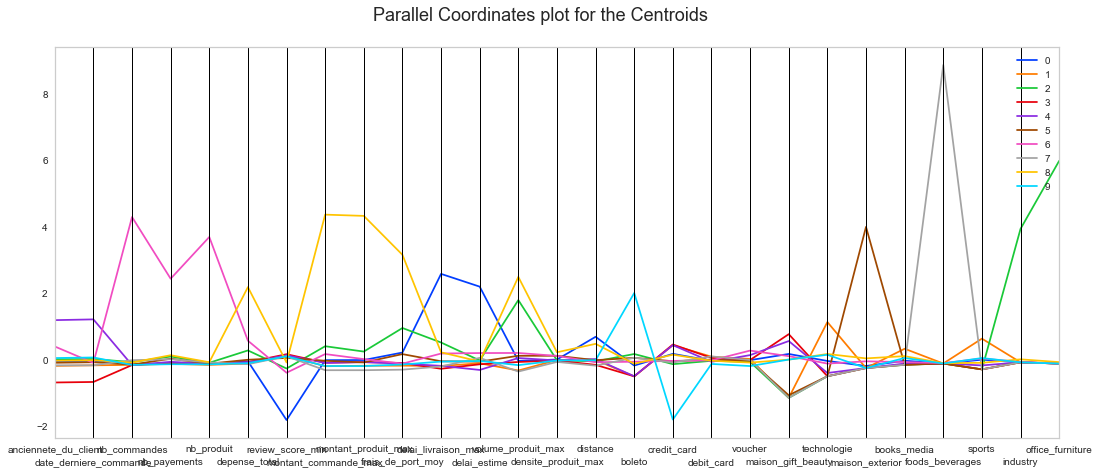

In [34]:
# Create a data frame containing our centroids
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=data.columns)
centroids['cluster'] = centroids.index

display_parallel_coordinates_centroids(centroids, 10)

In [36]:
centroids

,anciennete_du_client,date_derniere_commande,nb_commandes,nb_payements,nb_produit,depense_total,review_score_min,montant_commande_max,montant_produit_max,frais_de_port_moy,delai_livraison_max,delai_estime,volume_produit_max,densite_produit_max,distance,boleto,credit_card,debit_card,voucher,maison_gift_beauty,technologie,maison_exterior,books_media,foods_beverages,sports,industry,office_furniture,cluster
0,-0.049256,-0.032881,-0.142316,-0.104838,-0.138348,-0.044478,-1.814615,-0.012228,-0.008086,0.217441,2.584488,2.200741,-0.033222,0.006129,0.691123,-0.174328,0.177364,-0.029641,-0.010743,0.174432,-0.036071,-0.187726,-0.029440,-0.110846,0.001185,-0.077107,-0.111295,0
1,-0.184753,-0.167548,-0.154358,-0.122525,-0.154066,-0.114098,0.127853,-0.194642,-0.180298,-0.177433,-0.186997,-0.107299,-0.323807,-0.007371,-0.005780,-0.499832,0.438160,0.092194,0.023252,-1.146268,1.135175,-0.249974,0.331450,-0.112699,0.635679,-0.077107,-0.114932,1
2,0.015159,0.023399,-0.070856,0.097434,-0.090472,0.280404,-0.263621,0.407195,0.246427,0.955598,0.519270,-0.021632,1.796257,-0.017079,-0.046609,0.173105,-0.132232,-0.031969,-0.064696,-1.146378,-0.496468,-0.249974,-0.152568,-0.112699,-0.289739,3.939424,5.986716,2
3,-0.684219,-0.668392,-0.159575,-0.100148,-0.121943,-0.073038,0.166750,-0.087938,-0.069640,-0.096811,-0.271201,-0.136573,-0.066789,-0.023193,-0.153244,-0.499782,0.458955,0.055878,-0.006467,0.770257,-0.496468,-0.249974,-0.146676,-0.112699,-0.289739,-0.077107,-0.114932,3
4,1.192612,1.215153,-0.159646,-0.062768,-0.119663,-0.073903,0.134726,-0.095259,-0.071875,-0.116720,-0.183405,-0.306650,0.052022,-0.021246,0.021727,-0.495902,0.439314,-0.061887,0.139854,0.563061,-0.398693,-0.249974,-0.114666,-0.112699,-0.170244,-0.077107,-0.114932,4
5,-0.090515,-0.074561,-0.144280,0.031100,-0.117084,-0.000216,0.055009,-0.029944,-0.080810,0.169939,-0.045567,-0.056792,0.119677,0.119580,-0.012308,0.057819,-0.044119,0.005567,-0.035531,-1.067929,-0.496468,3.998743,-0.152568,-0.112699,-0.289739,-0.077107,-0.114932,5
6,0.399747,-0.094097,4.296433,2.439047,3.694861,0.573502,-0.390176,0.171577,0.019608,-0.117210,0.187097,0.201849,0.204185,0.115921,-0.074186,-0.059224,-0.033748,-0.018352,0.276339,0.108397,-0.115309,-0.047060,-0.069318,-0.101260,0.037698,-0.068802,-0.109320,6
7,-0.166950,-0.167089,-0.012987,0.015342,-0.081232,-0.133331,0.105593,-0.314433,-0.314612,-0.298415,-0.201441,0.056851,-0.355085,-0.065408,-0.177594,0.060210,-0.083883,0.100946,-0.007548,-1.146378,-0.496468,-0.249974,-0.152568,8.873164,-0.289739,-0.077107,-0.114932,7
8,-0.028756,-0.015124,-0.083643,0.136535,-0.075111,2.186388,-0.081438,4.368217,4.330231,3.158722,0.223633,-0.052442,2.494142,0.225702,0.479261,-0.121317,0.152810,-0.028836,-0.085846,0.004108,0.173358,0.041336,0.109665,-0.104433,-0.091842,0.012908,-0.070326,8
9,0.051201,0.068998,-0.154421,-0.133893,-0.139336,-0.102390,0.102122,-0.188358,-0.189965,-0.142359,-0.055254,-0.036519,-0.162225,-0.021633,-0.014610,2.008981,-1.799385,-0.126040,-0.189751,0.005385,0.149931,-0.249974,0.053740,-0.112699,0.051532,-0.077107,-0.114932,9


### Box plots

In [ ]:
# Convert non-scaled X to a data frame
X_reduceddf = pd.DataFrame(data, index=data.index, columns=data.columns)
X_reduceddf['cluster'] = clusters
X_reduceddf.head()

In [63]:
X_clustered.head()

,anciennete_du_client,date_derniere_commande,nb_commandes,nb_payements,nb_produit,depense_total,review_score_min,montant_commande_max,montant_produit_max,frais_de_port_moy,delai_livraison_max,delai_estime,volume_produit_max,densite_produit_max,distance,boleto,credit_card,debit_card,voucher,maison_gift_beauty,technologie,maison_exterior,books_media,foods_beverages,sports,industry,office_furniture,cluster
customer_unique_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
861eff4711a542e4b93843c6dd7febb0,1.502474,1.526164,-0.164174,-0.283584,-0.219007,-0.102646,-0.095863,-0.060828,-0.014709,0.116138,-0.435087,0.071344,3.859939,-0.159057,-0.426145,-0.499832,0.575253,-0.12604,-0.189751,-1.146378,-0.496468,-0.249974,-0.152568,-0.112699,-0.289739,-0.077107,8.700826,7
290c77bc529b7ac935b93aa66c333dc3,-0.077290,-0.059194,-0.164174,-0.283584,-0.219007,0.187225,0.669008,0.794067,0.835774,1.642535,0.395813,0.365777,1.594794,-0.007961,-0.316690,-0.499832,0.575253,-0.12604,-0.189751,0.872312,-0.496468,-0.249974,-0.152568,-0.112699,-0.289739,-0.077107,-0.114932,5
060e732b5b29e8181a18229c7b0b2b5e,-0.899811,-0.884629,-0.164174,-0.283584,-0.219007,-0.085685,0.669008,-0.010808,0.063079,-0.138262,1.434438,1.249077,1.281511,-0.021697,-0.963317,-0.499832,0.575253,-0.12604,-0.189751,-1.146378,-0.496468,-0.249974,-0.152568,-0.112699,-0.289739,-0.077107,8.700826,7
259dac757896d24d7702b9acbbff3f3c,-0.462439,-0.445707,-0.164174,-0.283584,-0.219007,-0.062557,0.669008,0.057402,0.114938,0.179738,0.188088,-0.124944,2.714720,-0.062905,-0.981840,-0.499832,0.575253,-0.12604,-0.189751,-1.146378,-0.496468,-0.249974,-0.152568,-0.112699,-0.289739,-0.077107,8.700826,7
345ecd01c38d18a9036ed96c73b8d066,-1.363295,-1.349755,-0.164174,-0.283584,-0.219007,0.059250,0.669008,0.416640,0.529808,0.116138,-0.123499,0.562066,0.339682,0.033247,-0.643371,-0.499832,0.575253,-0.12604,-0.189751,0.872312,-0.496468,-0.249974,-0.152568,-0.112699,-0.289739,-0.077107,-0.114932,5


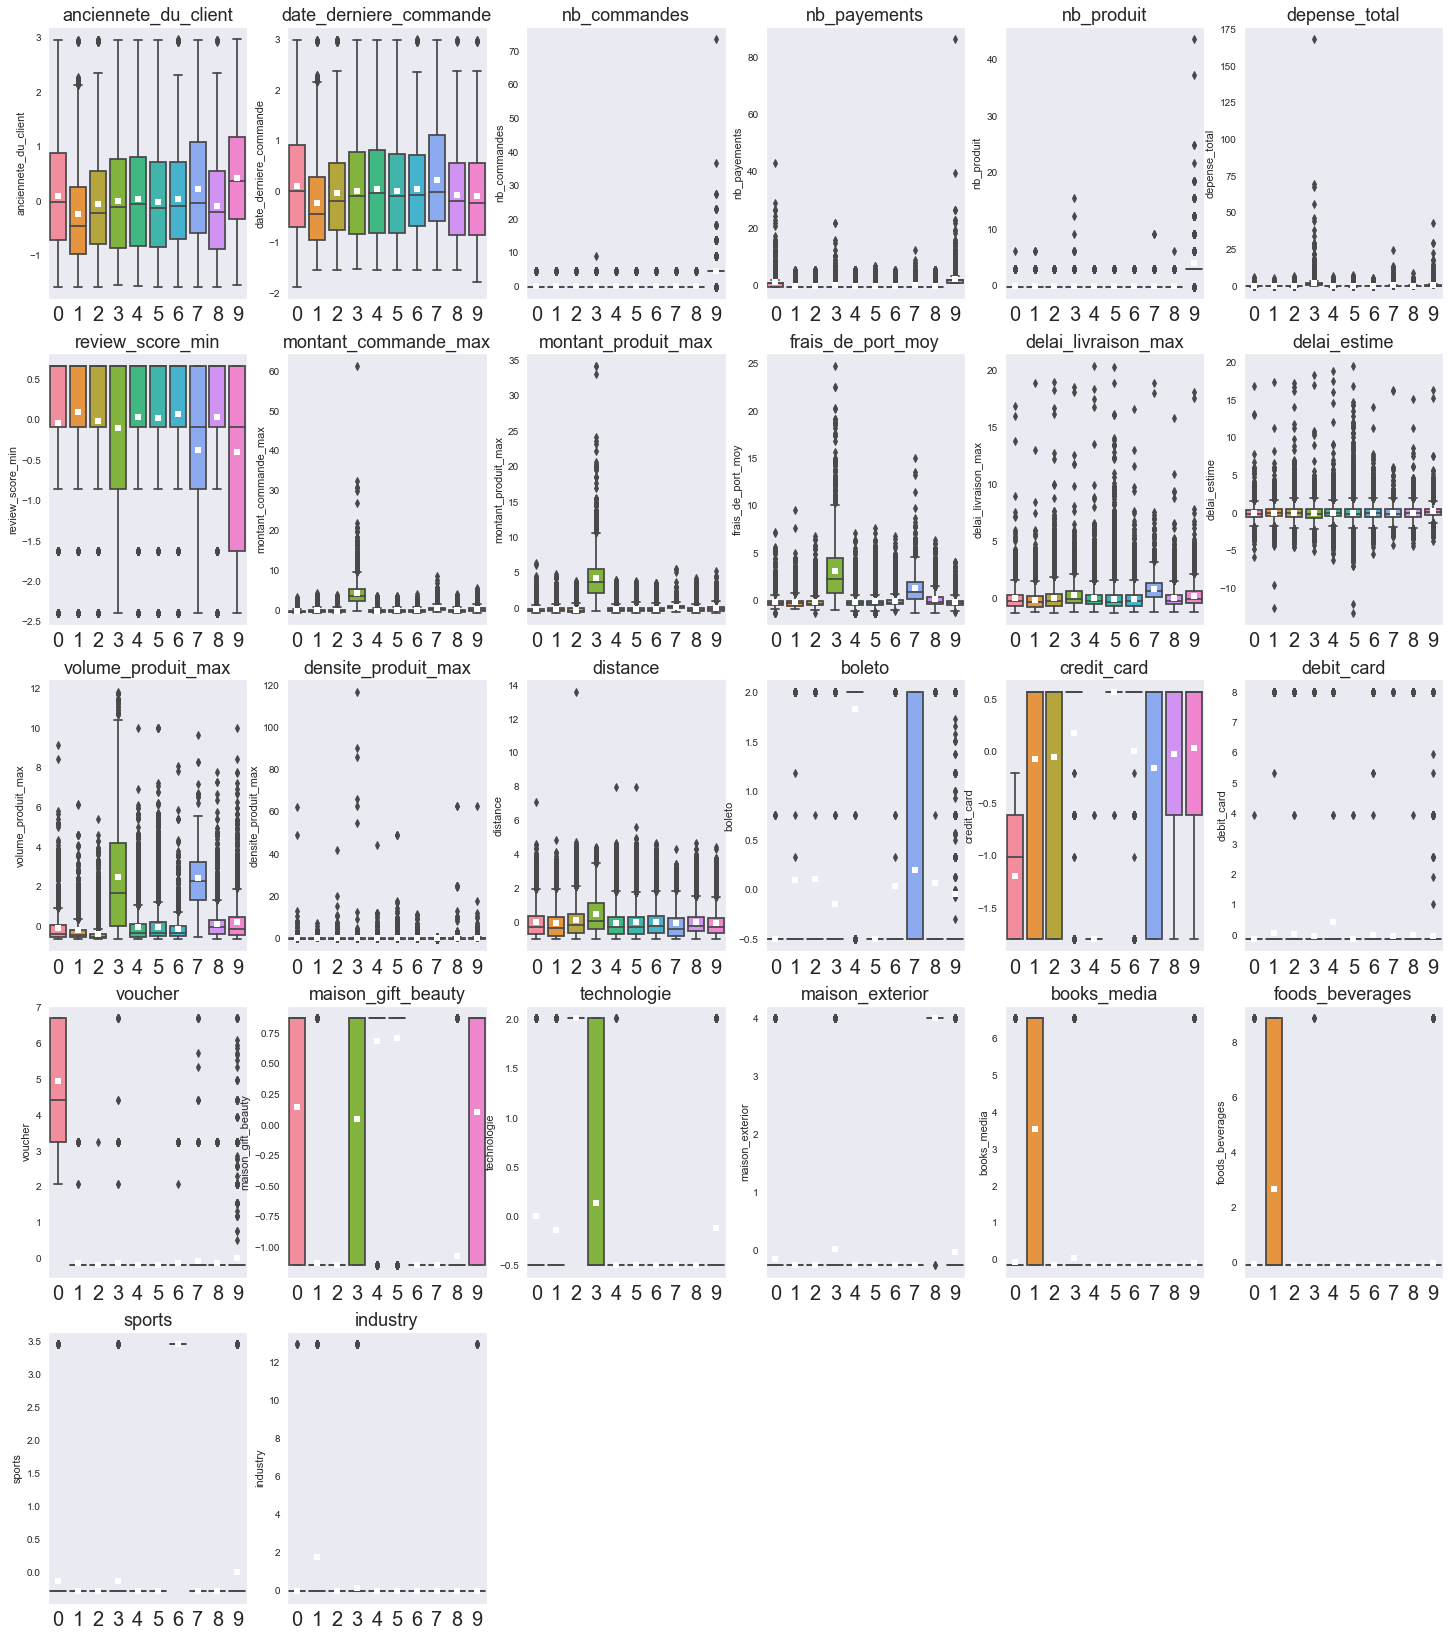

In [64]:
sns.color_palette("Set2")
sns.set_style("dark")

# cols = ['anciennete_du_client', 'nb_payements', 'nb_commandes']
cols = data.columns

fig = plt.figure(figsize=(25,12))

start = 0

for i in range(len(cols)-1):
    fig.subplots_adjust(top=1.95, wspace=.2)
    fig.add_subplot(5, 6, i+1)
    column = cols[i]
    ax = sns.boxplot(x = X_clustered['cluster'],
                     y = X_clustered[column],
                     data=X_clustered,
                     saturation=0.9,
                     #order=["0", "1", "2", "3", "4"],
                     showmeans=True,
                     meanprops={"marker":"s","markerfacecolor":"white"},
                     #color='darkred'
                    )
    ax.set(xlabel=None)
    # ax.set(ylabel=None)
    ax.set_title("{}".format(column), fontsize=18)
    for tick in ax.get_xticklabels():
        tick.set_size(20)
    for tick in ax.get_yticklabels():
        tick.set_size(10)
    start = start + 1

#sns.boxplot
    
#plt.title('Boxplot des clusters par les variables', fontdict=font)
    
plt.show()

### Heat map

In [65]:
x = X_clustered.groupby('cluster').mean()

In [66]:
std_scale = preprocessing.StandardScaler().fit(x)
x_scaled = std_scale.transform(x)

#minmax_scale = preprocessing.MinMaxScaler().fit(x)
#x_minmax_scaled = minmax_scale.transform(x)

<AxesSubplot:>

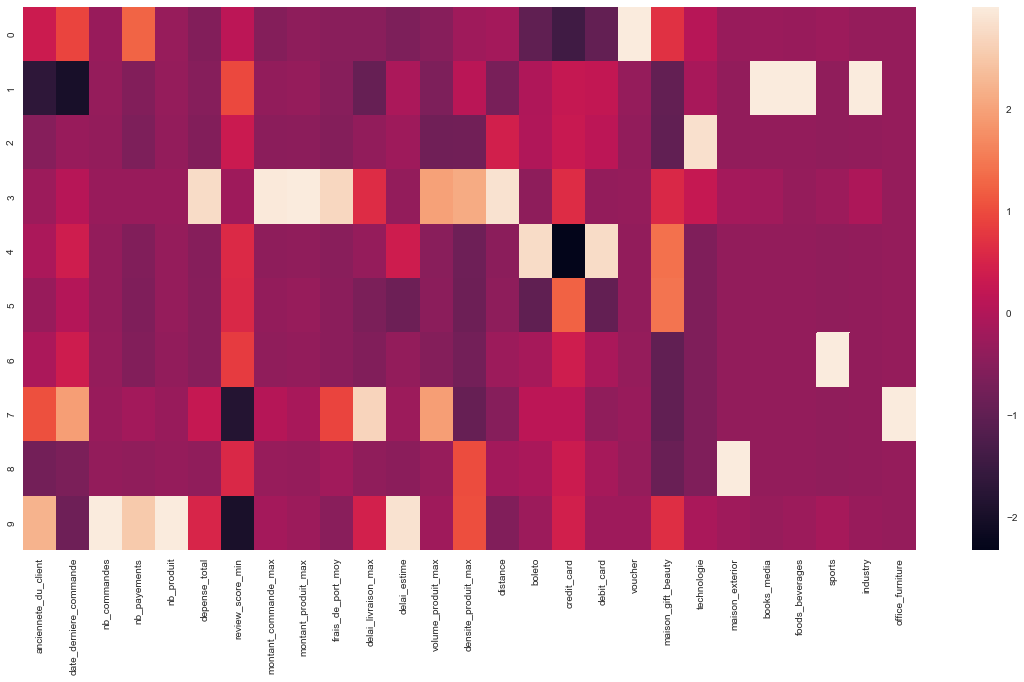

In [67]:
fig = plt.figure(figsize=(20,10))
sns.heatmap(pd.DataFrame(x_scaled, columns=x.columns))

### Radar plots

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

for i in X_clustered['cluster'].unique():
    fig.add_trace(go.Scatterpolar(
        r=X_clustered[X_clustered['cluster']==i].values.reshape(-1),
        theta=X_clustered.columns[:-1],
        fill='toself',
        name='Cluster ' + str(i)
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 3]
    )),
  showlegend=True
)

fig.show()